## Lab_2-Coding_questions
Chao-Chung,Liu

This lab provides insight into the concept of probability and statistical measures that you could use to classify the data as spam or not spam
and also clean the data by removing the outliers using measures of central tendency and dispersion.

## Part A

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

In [99]:
df = pd.read_csv('Lab2_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [100]:
v = CountVectorizer()
X_count = v.fit_transform(df['text']) 
y = df['label_num']
#6:4
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.4, random_state=42)

### Train the model using Gaussian and Multinominal classifiers

In [101]:
# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


### Check which model performs better

In [102]:
mnb_acc = accuracy_score(y_test, mnb.predict(X_test))
gnb_acc = accuracy_score(y_test, gnb.predict(X_test.toarray()))

print(f"MultinomialNB Accuracy: {mnb_acc:.4f}")
print(f"GaussianNB Accuracy: {gnb_acc:.4f}")
print(f"Conclusion: {'MultinomialNB' if mnb_acc > gnb_acc else 'GaussianNB'} performs better.")

MultinomialNB Accuracy: 0.9783
GaussianNB Accuracy: 0.9623
Conclusion: MultinomialNB performs better.


### Use the trained model to perform some predictions on test data

In [103]:
sample_emails = [
    "Subject: Urgent! You've won a $1,000 Walmart gift card. Click here to claim now.",
    "Subject: Hi Team, just a reminder for our meeting at 2 PM today."
]
sample_count = v.transform(sample_emails)
predictions = mnb.predict(sample_count)
print(f"Prediction results (1 is Spam, 0 is Ham): {predictions}")

Prediction results (1 is Spam, 0 is Ham): [1 0]


## Part B

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Remove outliers based on price per night for a given apartment/home.

In [105]:
df_nyc = pd.read_csv('AB_NYC_2019.csv')

df_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [106]:
print("Original Price Statistics:")
print(df_nyc['price'].describe())

Original Price Statistics:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


### IQR (Interquartile Range)、Z-Score、Percentile、MAD

In [107]:
# Method 1: Original (No cleaning)
df_orig = df_nyc.copy()

# Method 2: Percentile (1% to 99.9%)
p_low, p_high = df_nyc.price.quantile([0.01, 0.999])
df_percentile = df_nyc[(df_nyc.price > p_low) & (df_nyc.price < p_high)]

# Method 3: IQR (Interquartile Range)
Q1 = df_nyc.price.quantile(0.25)
Q3 = df_nyc.price.quantile(0.75)
IQR = Q3 - Q1
df_iqr = df_nyc[(df_nyc.price >= Q1 - 1.5*IQR) & (df_nyc.price <= Q3 + 1.5*IQR)]

# Method 4: Z-Score (Standard Deviation):3
mean_p = df_nyc.price.mean()
std_p = df_nyc.price.std()
df_std = df_nyc[(df_nyc.price > mean_p - 3*std_p) & (df_nyc.price < mean_p + 3*std_p)]

# Method 5: MAD (Median Absolute Deviation)
median_p = df_nyc.price.median()
mad_p = (df_nyc.price - median_p).abs().median()

df_mad = df_nyc[(df_nyc.price > median_p - 3*mad_p) & (df_nyc.price < median_p + 3*mad_p)]


methods = ["Original", "Percentile", "IQR", "Z-Score", "MAD"]
datasets = [df_orig, df_percentile, df_iqr, df_std, df_mad]

comp_data = []
for name, d in zip(methods, datasets):
    comp_data.append({
        "Method": name,
        "Max Price": d.price.max(),
        "Mean Price": round(d.price.mean(), 2),
        "Median Price": d.price.median(),
        "Remaining Rows": len(d)
    })

df_comparison = pd.DataFrame(comp_data)
print("--- Comparison Table ---")
print(df_comparison)



--- Comparison Table ---
       Method  Max Price  Mean Price  Median Price  Remaining Rows
0    Original      10000      152.72         106.0           48895
1  Percentile       2999      148.77         110.0           48183
2         IQR        334      119.97         100.0           45923
3     Z-Score        860      138.75         105.0           48507
4         MAD        243      107.00          99.0           42395


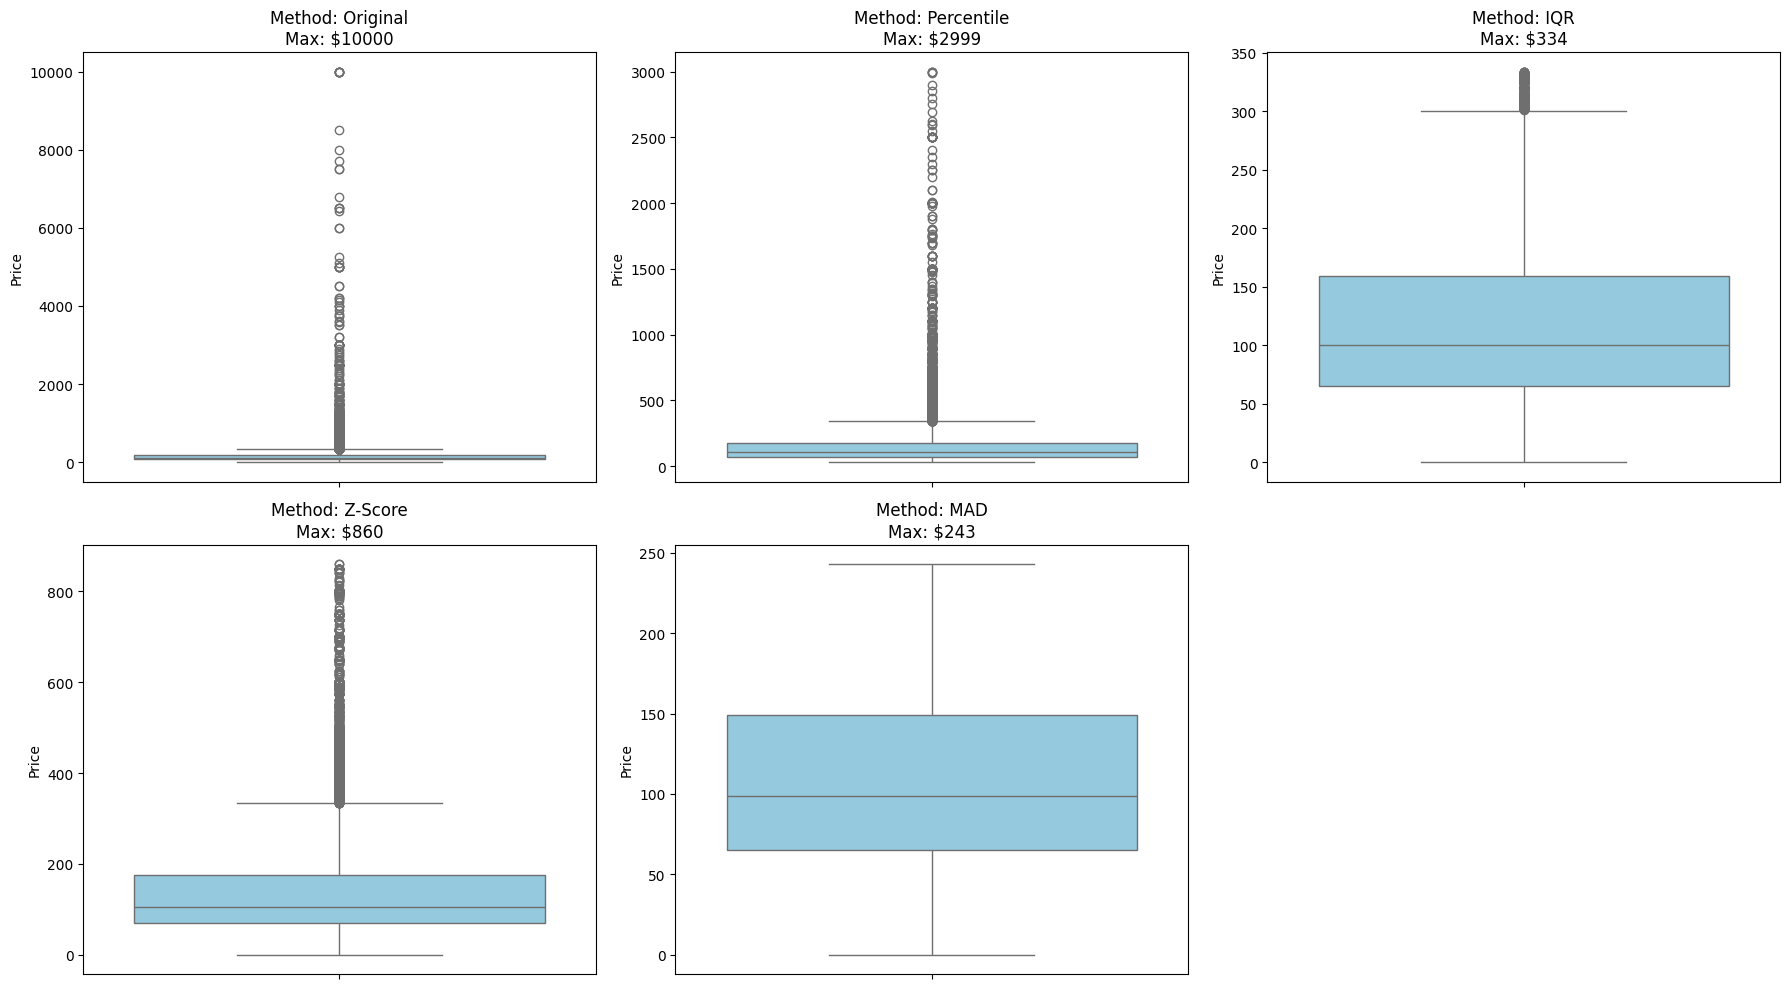

In [108]:
plt.figure(figsize=(18, 10))

for i, (name, d) in enumerate(zip(methods, datasets)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=d['price'], color='skyblue')
    plt.title(f'Method: {name}\nMax: ${d.price.max()}')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Method 5: MAD

In [109]:
import pandas as pd
import numpy as np

df_nyc = pd.read_csv('AB_NYC_2019.csv')
median_p = df_nyc.price.median()
mad_p = (df_nyc.price - median_p).abs().median()

lower_bound = median_p - 3 * mad_p
upper_bound = median_p + 3 * mad_p

lower_bound = max(0, lower_bound)

df_clean = df_nyc[(df_nyc.price >= lower_bound) & (df_nyc.price <= upper_bound)]

print(f"--- MAD Cleaning Summary ---")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Remaining Data Points: {len(df_clean)} (Out of {len(df_nyc)})")
print("\nFirst 5 rows of Cleaned Dataset:")
print(df_clean[['name', 'room_type', 'price']].head())



--- MAD Cleaning Summary ---
Lower Bound: 0
Upper Bound: 244.0
Remaining Data Points: 42410 (Out of 48895)

First 5 rows of Cleaned Dataset:
                                               name        room_type  price
0                Clean & quiet apt home by the park     Private room    149
1                             Skylit Midtown Castle  Entire home/apt    225
2               THE VILLAGE OF HARLEM....NEW YORK !     Private room    150
3                   Cozy Entire Floor of Brownstone  Entire home/apt     89
4  Entire Apt: Spacious Studio/Loft by central park  Entire home/apt     80


### Showcasing all the possibilities(Room Type & Price)

C:\Users\ThomasLiu-PC\AppData\Local\Temp\ipykernel_28352\1096795506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='price', data=df_clean, palette='muted')


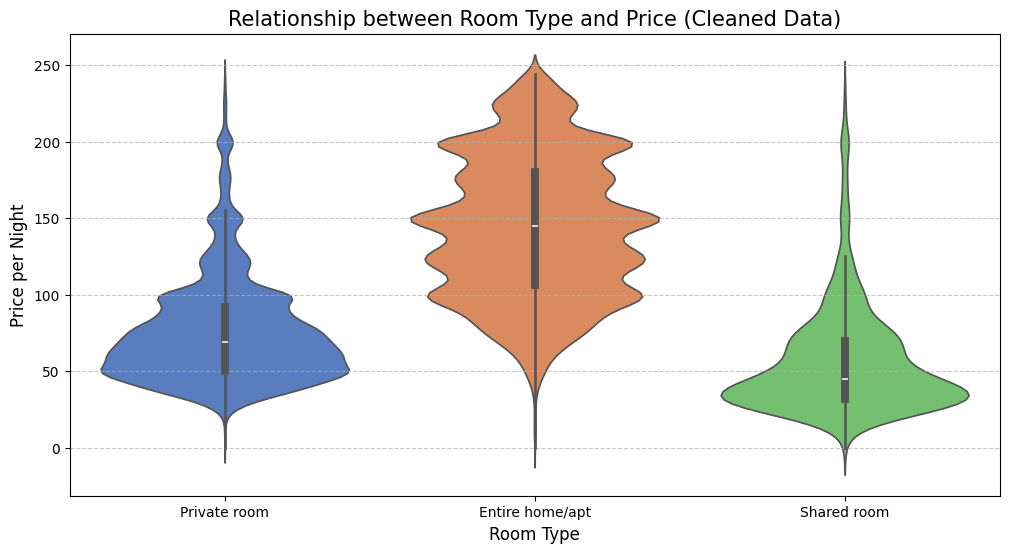


--- Numerical Analysis by Room Type ---
                   mean  median  count    std
room_type                                    
Entire home/apt  143.73   145.0  19552  45.73
Private room      76.65    69.0  21733  35.17
Shared room       56.75    45.0   1125  35.82


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.violinplot(x='room_type', y='price', data=df_clean, palette='muted')

plt.title('Relationship between Room Type and Price (Cleaned Data)', fontsize=15)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price per Night', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

room_analysis = df_clean.groupby('room_type')['price'].agg(['mean', 'median', 'count', 'std']).round(2)
print("\n--- Numerical Analysis by Room Type ---")
print(room_analysis)

### Analysis Result:

1. Different Prices: From the chart, we can see that different room types have different prices.
2. Most Expensive: "Entire home/apt" is the most expensive room type. Its middle price (median) is much higher than others.
3. Cheapest: "Shared room" is the cheapest. Most of these rooms have very low prices.
4. Price Range: "Private room" is in the middle. The price is not too high and not too low.
5. Clean Data: Because we used the MAD method, there are no crazy prices (like $10,000) in the chart. The data looks very clear now.

## Github

https://github.com/caatat741213/Artificial-Intelligence-Algorithms-and-Mathematics-s-Lab.git